In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv('data.csv')
data=data.drop(columns=data.columns[0])
data.head()
print('The number of rows in the dataset is',data.shape[0])
print('The number of columns in the dataset is',data.shape[1])


The number of rows in the dataset is 15
The number of columns in the dataset is 2


#### Plotting the data

/tmp/ipykernel_63380/588286051.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_63380/588286051.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['LSAT'], y=data['GPA'], palette='coolwarm')


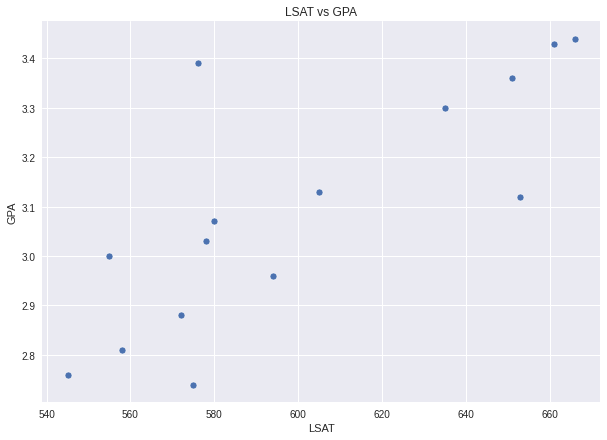

In [2]:
#   plot the data
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
sns.scatterplot(x=data['LSAT'], y=data['GPA'], palette='coolwarm')
plt.title('LSAT vs GPA')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.show()

### Correlations

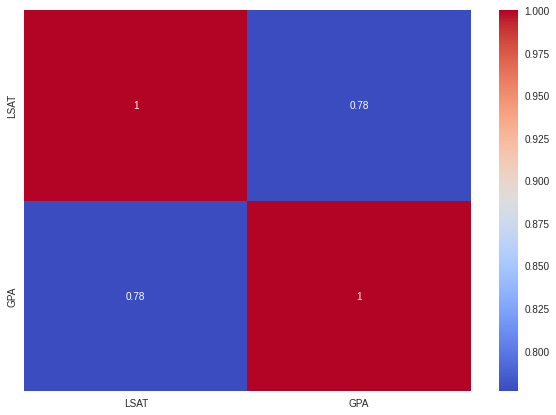

In [3]:
plt.figure(figsize=(10,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# change the size of the plot   
plt.show()

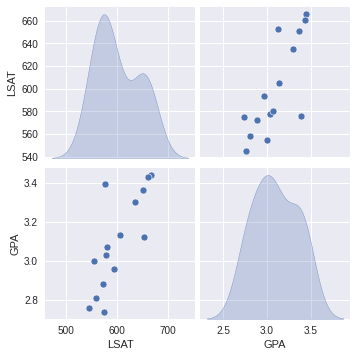

In [4]:
# draw a scatter plot of the data
sns.pairplot(data, diag_kind='kde')

## TASK A and Bootstrap

In [5]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import timeit
from itertools import chain, combinations
import random
def calculate_corr_sample(sample):
    last=[ x[0] for x in sample]
    gpa=[ x[1] for x in sample]
    return np.corrcoef(last,gpa)[0,1]

#### for 4000 sample size

In [6]:
starttime = timeit.default_timer()

samples_count = 40000
samples=np.random.choice(len(data),size=(samples_count,len(data)),replace=True)
bootstrap_samples=[]
for i in range(samples_count):
    LSAT=[data.iloc[x]['LSAT'] for x in samples[i]]
    GPA=[data.iloc[x]['GPA'] for x in samples[i]]
    bootstrap_samples.append([[lsat,gpa]for lsat,gpa in zip(LSAT,GPA)])
Correlations_bootstrap=[calculate_corr_sample(t) for t in bootstrap_samples]
print("The time difference is :", timeit.default_timer() - starttime)    

The time difference is : 167.20961554400856


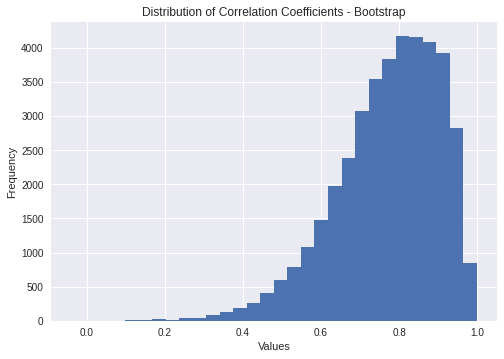

In [7]:

plt.hist(Correlations_bootstrap, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Correlation Coefficients - Bootstrap')
plt.show()

#### In complete enumeration , We expect to have 2**(size of the data) possible enumerations

In [8]:
starttime = timeit.default_timer()
print("The start time is :",starttime)

print('Expected combinations:',(2**len(data)))

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable) 
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
# all possible combinations of the data indices
allCombination=[]
for i, combo in enumerate(powerset(data.index), 1):
    allCombination.append(combo)
print('Implemented Length of all combinations:',len(allCombination))

# show 5 items of all combinations randomly
for i in random.sample(allCombination,5):
    print('a sample from all possible enumerations:',i)

Correlations_full_enum=[]
for k in allCombination[1000:1020]:
    NewSample=data.iloc[[x for x in k]]
    Correlations_full_enum.append(np.corrcoef(NewSample['LSAT'],NewSample['GPA'])[0,1])
print("The time difference is :", timeit.default_timer() - starttime)


The start time is : 81084.329620978
Expected combinations: 32768
Implemented Length of all combinations: 32768
a sample from all possible enumerations: (0, 1, 4, 6, 8, 9, 11, 12, 13)
a sample from all possible enumerations: (0, 2, 5, 6, 8, 12, 13)
a sample from all possible enumerations: (0, 2, 3, 4, 5, 6, 9, 14)
a sample from all possible enumerations: (0, 1, 4, 5, 6, 8)
a sample from all possible enumerations: (1, 2, 3, 4, 5, 6, 9, 13, 14)
The time difference is : 0.040544143004808575


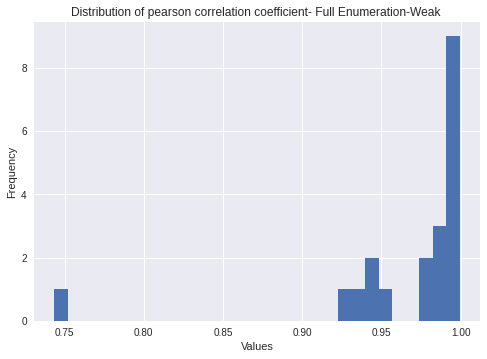

In [9]:
plt.hist(Correlations_full_enum, bins=30)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of pearson correlation coefficient- Full Enumeration-Strict')
plt.show()

#### Comparing resulted Distributions

The time difference is : 0.7256602270063013
The time difference is : 0.726148968009511
The time difference is : 0.7272654400003375
The time difference is : 0.7282671680004569
The time difference is : 0.7292492450069403
The time difference is : 0.7305137549992651
The time difference is : 0.7314450039993972
The time difference is : 0.7322546370123746
The time difference is : 0.733279260006384
The time difference is : 0.7342365110089304
The time difference is : 0.7351815270085353
The time difference is : 0.7364845080010127
The time difference is : 0.7375888310052687
The time difference is : 0.7385346080118325
The time difference is : 0.7395590750093106
The time difference is : 0.740635784008191
The time difference is : 0.7416473680059426
The time difference is : 0.7426611210103147
The time difference is : 0.7436097050085664
The time difference is : 0.7446435210003983


Text(0.5, 1.0, 'Distribution of pearson correlation coefficient- Full Enumeration')

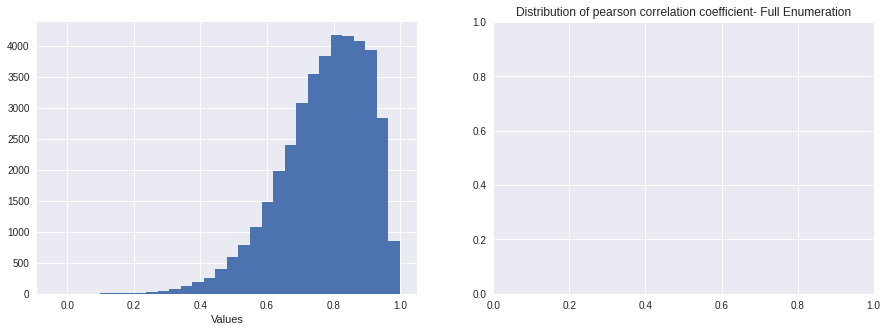

In [10]:
# plot the distribution of correlation coefficients side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(Correlations_bootstrap, bins=30)
ax[0].set_xlabel('Values')
Correlations_full_enum=[]
for k in allCombination[1000:1020]:
    NewSample=data.iloc[[x for x in k]]
    Correlations_full_enum.append(np.corrcoef(NewSample['LSAT'],NewSample['GPA'])[0,1])
    print("The time difference is :", timeit.default_timer() - starttime)
ax[1].set_title('Distribution of pearson correlation coefficient- Full Enumeration')


In [11]:
# calculate the mean and standard deviation of the correlation coefficients
print('The mean of the correlation coefficients of the bootstrap is',np.mean(Correlations_bootstrap))
print('The standard deviation of the correlation coefficients of the bootstrap is',np.std(Correlations_bootstrap))
print('The mean of the correlation coefficients of the full enumeration is',np.mean(Correlations_full_enum))
print('The standard deviation of the correlation coefficients of the full enumeration is',np.std(Correlations_full_enum))

print('without any enumeration or bootstrap, the value for the correlation coefficient is',np.corrcoef(data['LSAT'],data['GPA'])[0,1])

The mean of the correlation coefficients of the bootstrap is 0.7714201816350021
The standard deviation of the correlation coefficients of the bootstrap is 0.1331511525297492
The mean of the correlation coefficients of the full enumeration is 0.9666875143910401
The standard deviation of the correlation coefficients of the full enumeration is 0.05603307123577183
without any enumeration or bootstrap, the value for the correlation coefficient is 0.776374491289407


## TASK B

In [ ]:
import itertools

def gray_code(n):
    """Generates a Gray code sequence for n bits"""
    return [''.join(x) for x in itertools.product('01', repeat=n)]

def access_combinations(data, n):
    """Accesses combinations of data using n-bit Gray code"""
    gray_seq = gray_code(n)
    combinations = []
    for code in gray_seq:
        combo = [data[i] for i in range(len(data)) if code[i] == '1']
        combinations.append(combo)
    return combinations

In [14]:
data.head()

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44


In [17]:
import statsmodels.api as sm

#define response variable
y = data['LSAT']

#define explanatory variable
x = data[['GPA']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()
p=model.params
#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   LSAT   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     19.73
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           0.000665
Time:                        16:39:30   Log-Likelihood:                -69.834
No. Observations:                  15   AIC:                             143.7
Df Residuals:                      13   BIC:                             145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        187.8996     93.115      2.018      0.0

/home/jay/miniconda3/envs/jay/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
data['GPA']

0     3.39
1     3.30
2     2.81
3     3.03
4     3.44
5     3.07
6     3.00
7     3.43
8     3.36
9     3.13
10    3.12
11    2.74
12    2.76
13    2.88
14    2.96
Name: GPA, dtype: float64

/tmp/ipykernel_63380/268302008.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_63380/268302008.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data['GPA'], y=data['LSAT'], palette='coolwarm')


<Axes: xlabel='GPA', ylabel='LSAT'>

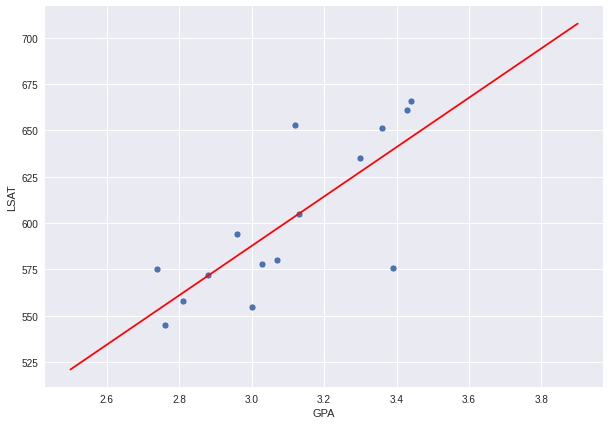

In [36]:
# plot the regression line
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
# generate x-values for your regression line (two is sufficient)
x = np.arange(2.5, 4, 0.1)
# plot the data
sns.scatterplot(x=data['GPA'], y=data['LSAT'], palette='coolwarm')
sns.lineplot(x=x, y=p[0]+p[1]*x, color='red')